<a href="https://colab.research.google.com/github/Randell777/IE-trends-activity/blob/main/May_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Cleaning

In [43]:
naia_df = pd.read_excel("NAIA Daily 2017.xlsx")
naia_df

,YEAR,MONTH,DAY,RAINFALL,TMAX,TMIN,TMEAN,WIND SPEED,WIND DIRECTION
0,NaN,NaN,NaN,mm,°C,°C,°C,m/s,degrees
1,2017.0,1.0,1.0,0,31.931,23.6,27.7655,3,80
2,2017.0,1.0,2.0,0,31,24.6,27.8,2,70
3,2017.0,1.0,3.0,0,32.5,25.2,28.85,3,80
4,2017.0,1.0,4.0,T,NaN,24.2,NaN,2,100
...,...,...,...,...,...,...,...,...,...
361,2017.0,12.0,27.0,1.5,28.3,24.6,26.45,2,70
362,2017.0,12.0,28.0,0,31.2,24.7,27.95,3,70
363,2017.0,12.0,29.0,0,29.6,23.7,26.65,3,70
364,2017.0,12.0,30.0,0,29.5,22.8,26.15,3,70


In [ ]:
## Dropping Rows
naia_df = naia_df.drop(index=0)
## original file = file operation

In [46]:
naia_df

,YEAR,MONTH,DAY,RAINFALL,TMAX,TMIN,TMEAN,WIND SPEED,WIND DIRECTION
1,2017.0,1.0,1.0,0,31.931,23.6,27.7655,3,80
2,2017.0,1.0,2.0,0,31,24.6,27.8,2,70
3,2017.0,1.0,3.0,0,32.5,25.2,28.85,3,80
4,2017.0,1.0,4.0,T,NaN,24.2,NaN,2,100
5,2017.0,1.0,5.0,0.45,NaN,22.78,NaN,2,110
...,...,...,...,...,...,...,...,...,...
361,2017.0,12.0,27.0,1.5,28.3,24.6,26.45,2,70
362,2017.0,12.0,28.0,0,31.2,24.7,27.95,3,70
363,2017.0,12.0,29.0,0,29.6,23.7,26.65,3,70
364,2017.0,12.0,30.0,0,29.5,22.8,26.15,3,70


In [47]:
### NaN Values
naia_df.isna().sum()

YEAR               0
MONTH              0
DAY                0
RAINFALL           0
TMAX              11
TMIN               8
TMEAN             45
WIND SPEED         0
WIND DIRECTION     0
dtype: int64

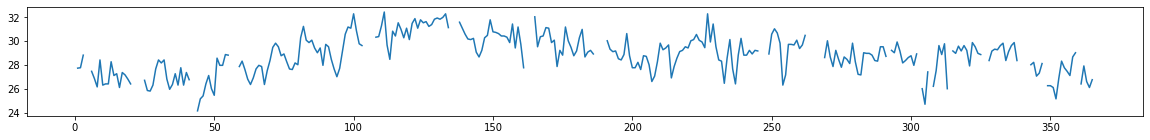

In [48]:
## Exploring the data
plt.figure(figsize=(20,2))
naia_df['TMEAN'].plot()

In [ ]:
### Converting Data Types
naia_df.astype(float)

In [50]:
### Check datatypes
naia_df.dtypes

YEAR              float64
MONTH             float64
DAY               float64
RAINFALL           object
TMAX               object
TMIN               object
TMEAN              object
WIND SPEED         object
WIND DIRECTION     object
dtype: object

In [51]:
"""
Cleaning Rules:
T - 0.01
"""
### Fill in the T
naia_df['RAINFALL'] = naia_df['RAINFALL'].replace({"T":0.01})
naia_df

,YEAR,MONTH,DAY,RAINFALL,TMAX,TMIN,TMEAN,WIND SPEED,WIND DIRECTION
1,2017.0,1.0,1.0,0.00,31.931,23.6,27.7655,3,80
2,2017.0,1.0,2.0,0.00,31,24.6,27.8,2,70
3,2017.0,1.0,3.0,0.00,32.5,25.2,28.85,3,80
4,2017.0,1.0,4.0,0.01,NaN,24.2,NaN,2,100
5,2017.0,1.0,5.0,0.45,NaN,22.78,NaN,2,110
...,...,...,...,...,...,...,...,...,...
361,2017.0,12.0,27.0,1.50,28.3,24.6,26.45,2,70
362,2017.0,12.0,28.0,0.00,31.2,24.7,27.95,3,70
363,2017.0,12.0,29.0,0.00,29.6,23.7,26.65,3,70
364,2017.0,12.0,30.0,0.00,29.5,22.8,26.15,3,70


In [53]:
### Converting Data Types Again!
naia_df = naia_df.astype(float)

In [54]:
### Check datatypes
naia_df.dtypes

YEAR              float64
MONTH             float64
DAY               float64
RAINFALL          float64
TMAX              float64
TMIN              float64
TMEAN             float64
WIND SPEED        float64
WIND DIRECTION    float64
dtype: object

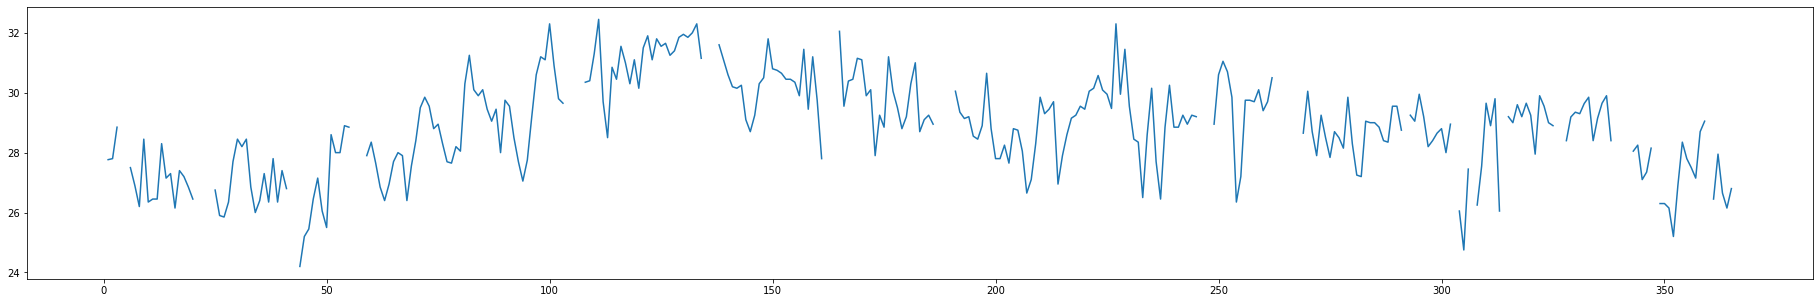

In [55]:
## Check the data again
plt.figure(figsize=(32,5))
naia_df['TMEAN'].plot()

In [56]:
## Connecting the dots
naia_df['TMEAN'] = naia_df['TMEAN'].interpolate()
naia_df['TMIN'] = naia_df['TMIN'].interpolate()
naia_df['TMAX'] = naia_df['TMAX'].interpolate()

In [57]:
## Check data again

In [59]:
## Applying a converstion
def celsius_to_kelvin(temp):
  K = temp + 273.15
  return K
celsius_to_kelvin(32)

305.15

In [60]:
naia_temps = naia_df[['TMIN','TMAX','TMEAN']]
naia_df[['TMIN','TMAX','TMEAN']] = celsius_to_kelvin(naia_temps)
naia_df

,YEAR,MONTH,DAY,RAINFALL,TMAX,TMIN,TMEAN,WIND SPEED,WIND DIRECTION
1,2017.0,1.0,1.0,0.00,305.081,296.75,300.9155,3.0,80.0
2,2017.0,1.0,2.0,0.00,304.150,297.75,300.9500,2.0,70.0
3,2017.0,1.0,3.0,0.00,305.650,298.35,302.0000,3.0,80.0
4,2017.0,1.0,4.0,0.01,305.500,297.35,301.5500,2.0,100.0
5,2017.0,1.0,5.0,0.45,305.350,295.93,301.1000,2.0,110.0
...,...,...,...,...,...,...,...,...,...
361,2017.0,12.0,27.0,1.50,301.450,297.75,299.6000,2.0,70.0
362,2017.0,12.0,28.0,0.00,304.350,297.85,301.1000,3.0,70.0
363,2017.0,12.0,29.0,0.00,302.750,296.85,299.8000,3.0,70.0
364,2017.0,12.0,30.0,0.00,302.650,295.95,299.3000,3.0,70.0


In [61]:
### Make Data
naia_df[["YEAR","MONTH","DAY"]] = naia_df[["YEAR","MONTH","DAY"]].astype(int).astype(str)
naia_df['DATE'] = naia_df[["MONTH","DAY","YEAR"]].agg('/'.join,axis=1)
## MM/DD/YYYY
# naia_df['DATE'] = naia_df[['MONTH', 'DAY', 'YEAR']].agg('/'.join,axis=1)
# naia_df = naia_df.drop(labels=['YEAR','MONTH','DAY'],axis=1)
naia_df

,YEAR,MONTH,DAY,RAINFALL,TMAX,TMIN,TMEAN,WIND SPEED,WIND DIRECTION,DATE
1,2017,1,1,0.00,305.081,296.75,300.9155,3.0,80.0,1/1/2017
2,2017,1,2,0.00,304.150,297.75,300.9500,2.0,70.0,1/2/2017
3,2017,1,3,0.00,305.650,298.35,302.0000,3.0,80.0,1/3/2017
4,2017,1,4,0.01,305.500,297.35,301.5500,2.0,100.0,1/4/2017
5,2017,1,5,0.45,305.350,295.93,301.1000,2.0,110.0,1/5/2017
...,...,...,...,...,...,...,...,...,...,...
361,2017,12,27,1.50,301.450,297.75,299.6000,2.0,70.0,12/27/2017
362,2017,12,28,0.00,304.350,297.85,301.1000,3.0,70.0,12/28/2017
363,2017,12,29,0.00,302.750,296.85,299.8000,3.0,70.0,12/29/2017
364,2017,12,30,0.00,302.650,295.95,299.3000,3.0,70.0,12/30/2017


# Normalization